### Lab 1 Python Fundamentals

#### Task:
- Count and plot DNA sequences

In [15]:
# open up the dna_raw -data file

def read_dna_file(file_path = 'dna_raw.txt'):
    with open(file_path, 'r') as file:
        lines = file.readlines()

# make a dictionary of the dna sequences

    sequences = {}
    sequence_id = None
    sequence = ''

    for line in lines:
        line = line.strip()
        if line.startswith('>'):
            if sequence_id:
                sequences[sequence_id] = sequence
            sequence_id = line[1:]
            sequence = ''
        else:
            sequence += line.lower()
    if sequence_id:
        sequences[sequence_id] = sequence
        
        return sequences

In [19]:
from collections import Counter

#creating a function that counts the number of A, T, C, G in the sequences

def count_dna_letters(sequences):
    dna_counts = {}
    for sequence_id, sequence in sequences.items():
        counts = Counter(sequence)

        # counting only occurrences of A, T, C, G
        filtered_counts = {letter: counts[letter] for letter in 'ATCG'}
        dna_counts[sequence_id] = filtered_counts
    return dna_counts

In [22]:
# plot the counts of the sequences

import matplotlib.pyplot as plt

def plot_dna_counts(dna_counts):
    for sequence_id, counts in dna_counts.items():
        letters = list(counts.keys())
        frequencies = list(counts.values())

        plt.figure()
        plt.bar(letters, frequencies, color = ['red', 'green', 'blue', 'yellow'])
        plt.title(f"Frequency of DNA letters in {sequence_id}")
        plt.xlabel('DNA letter')
        plt.ylabel('Frequency')
        plt.show()

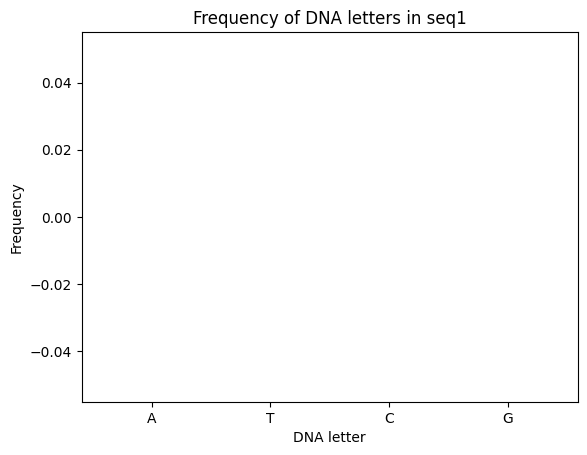

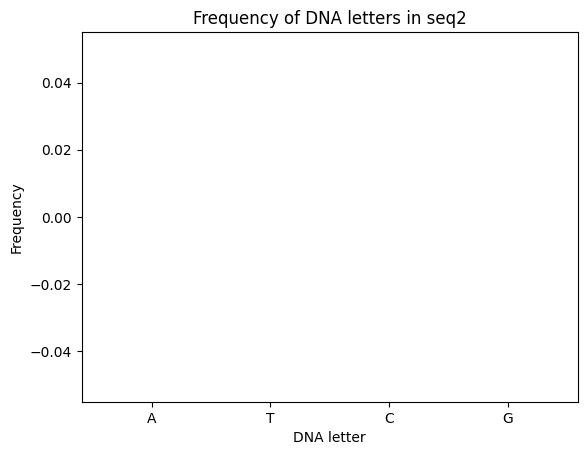

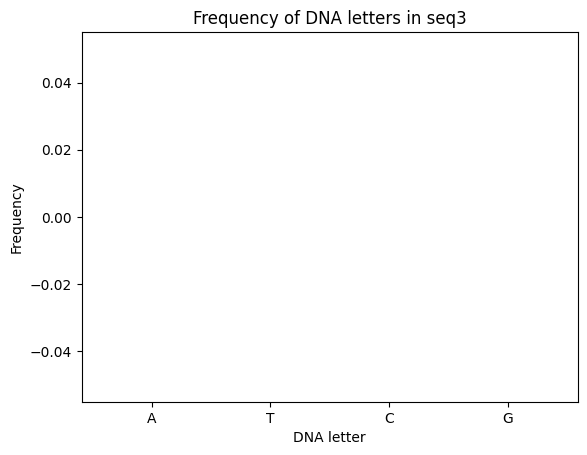

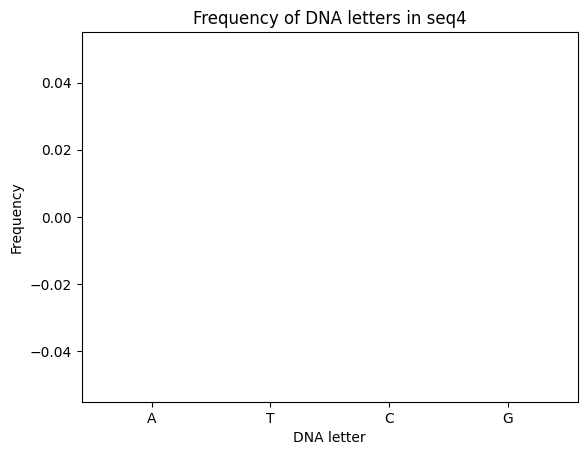

In [23]:
# Putting it all together

# Step 1: Read the DNA file
file_path = 'dna_raw.txt'
sequences = read_dna_file(file_path)

# Step 2: Count the DNA sequences
dna_counts = count_dna_letters(sequences)

# Step 3: Plot the DNA counts
plot_dna_counts(dna_counts)